In [1]:
!nvidia-smi

Tue Nov 29 22:44:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.154                Driver Version: 390.154                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro K1100M       Off  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P0    N/A /  N/A |    713MiB /  1999MiB |     21%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import roboticstoolbox

## Tạo robot

In [2]:
import numpy as np
from math import pi, sin, cos
from roboticstoolbox import DHRobot, RevoluteDH
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

rC1=np.array([-240.46, -2.28, -139.25])/1000
rC2=np.array([-0.01, 213.35, 146.34])/1000
rC3=np.array([-37.92, 56.60, 29.73])/1000
rC4=np.array([-10.80, 0.36, 59.50])/1000
rC5=np.array([13.60, -114.15, -99.62])/1000

I1=np.array([16276348.15, 59567274.21, 72097187.65,0,0,0])/1e9
I2=np.array([13060964.16, 43498149.19, 7849056.42,0, 0, 0])/1e9
I3=np.array([8488723.47, 15197458.26, 17151274.34,0, 0, 0])/1e9
I4=np.array([998622.53, 2297521.13, 2606582.33,0, 0, 0])/1e9
I5=np.array([2680533.00, 10713275.00, 11512705.79,0, 0, 0])/1e9

m1=8491.07/1000;
m2=4423.53/1000;
m3=1970.11/1000;
m4=464.63/1000;
m5=1401.88/1000

d1=210/1000; d3=336/1000; d5=240/1000;

# T01=DH(q1,d1,0,90);
# T12=DH(q2-pi/2,0,0,-90);
# T23=DH(q3,d3,0,90);
# T34=DH(q4,0,0,-90);
# T45=DH(q5,d5,0,90);


# d1=125.5
a1=0
alpha1=pi/2

d2=0
a2=0
alpha2=-pi/2

# d3=340
a3=0
alpha3=pi/2

d4=0
a4=0
alpha4=-pi/2

# d5=270
a5=0
alpha5=pi/2

# L1 = RevoluteDH(a=a1, d=d1, alpha=alpha1, m=m1, I=I1, r=rC1)
# L2 = RevoluteDH(a=a2, d=d2, alpha=alpha2, m=m2, I=I2, r=rC2)
# L3 = RevoluteDH(a=a3, d=d3, alpha=alpha3, m=m3, I=I3, r=rC3)
# L4 = RevoluteDH(a=a4, d=d4, alpha=alpha4, m=m4, I=I4, r=rC4)
# L5 = RevoluteDH(a=a5, d=d5, alpha=alpha5, m=m5, I=I5, r=rC5)

# canh tay do (DH mới)
L1 = RevoluteDH(a=0, d=125.5, alpha=pi/2)
L2 = RevoluteDH(a=0, d=0, alpha=-pi/2)
L3 = RevoluteDH(a=0, d=340, alpha=-pi/2)
L4 = RevoluteDH(a=0, d=0, alpha=pi/2)
L5 = RevoluteDH(a=0, d=270, alpha=pi/2)

robot = DHRobot([L1, L2, L3, L4, L5],name='Huy',gravity=[0,0,9.81])
robot = DHRobot([L1, L2, L3, L4, L5],name='exos5',gravity=[0,0,9.81])
robot

DHRobot: exos5, 5 joints (RRRRR), dynamics, standard DH parameters
┌────┬───────┬────┬────────┐
│θⱼ  │  dⱼ   │ aⱼ │   ⍺ⱼ   │
├────┼───────┼────┼────────┤
│ q1 │ 125.5 │  0 │  90.0° │
│ q2 │     0 │  0 │ -90.0° │
│ q3 │   340 │  0 │ -90.0° │
│ q4 │     0 │  0 │  90.0° │
│ q5 │   270 │  0 │  90.0° │
└────┴───────┴────┴────────┘

┌─┬──┐
└─┴──┘

## Load data

In [119]:
y= np.load('data/train/q_dmps_db10_gen_25.npy')
X= np.load('data/train/E_q_dmps_db10_gen_25.npy')/1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state= 112)
n=4000
# X_train = X[:n]
# X_test = X[n:]
# y_train = y[:n]
# y_test = y[n:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 50, 3) (4000, 50, 5) (1000, 50, 3) (1000, 50, 5)


# Keras

In [120]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from datetime import datetime

In [121]:

# Load extension tensorbard

# %load_ext tensorboard

In [122]:
# model = keras.Sequential()
# model.add(keras.Input(shape=(50,3)))
# # model.add(layers.Embedding(1000, 50, input_length=50))
# # model.add(layers.Bidirectional(layers.LSTM(50, return_sequences=True)))
# model.add(layers.Bidirectional(layers.LSTM(1000, return_sequences=True, activation='relu')))
# model.add(layers.Dropout(0.3))     
# # model.add(layers.Bidirectional(layers.LSTM(200,return_sequences=True, activation='relu')))
# # model.add(layers.Dropout(0.3))     
# # model.add(layers.Bidirectional(layers.LSTM(10, return_sequences=True)))
# model.add(layers.TimeDistributed(layers.Dense(5)))

# model.summary()

In [129]:
model = keras.models.load_model('weights/exos_5q_db10_2000_gen_25_random.h5')

In [130]:
title = 'Playing the ball task'
name = '10_random'

## Cài đặt tham số

In [131]:
epochs = 200
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
# sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adam= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mse',  metrics=["mae"])

tensorboard_callback = keras.callbacks.TensorBoard()

# his = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

In [132]:
# model.save('exos_5q_db10_2000_gen_25.h5')

In [133]:
import pandas as pd

y_pred = model.predict(X_train)
# end = time.time()
# print(end - start)

re_pred = robot.fkine(y_pred[:,-1,:]).t
re_test = robot.fkine(y_train[:,-1,:]).t
np.mean(np.sqrt(np.sum((re_pred-re_test)**2, axis = 1)))
df =pd.DataFrame()
df['mse']= np.sqrt(np.sum((re_pred-re_test)**2, axis = 1))

df['mae_x']= (re_pred-re_test)[:,0]
df['mae_y']= (re_pred-re_test)[:,1]
df['mae_z']= (re_pred-re_test)[:,2]

df['mae_q1']= (abs(y_pred[:,-1,:]-y_train[:,-1,:])[:,0])*180/np.pi
df['mae_q2']= abs(y_pred[:,-1,:]-y_train[:,-1,:])[:,1]*180/np.pi
df['mae_q3']= abs(y_pred[:,-1,:]-y_train[:,-1,:])[:,2]*180/np.pi
df['mae_q4']= abs(y_pred[:,-1,:]-y_train[:,-1,:])[:,3]*180/np.pi
df['mae_q5']= abs(y_pred[:,-1,:]-y_train[:,-1,:])[:,4]*180/np.pi

df['sim_q1']=cosine_similarity(y_pred[:,:,0],y_train[:,:,0]).diagonal()
df['sim_q2']=cosine_similarity(y_pred[:,:,1],y_train[:,:,1]).diagonal()
df['sim_q3']=cosine_similarity(y_pred[:,:,2],y_train[:,:,2]).diagonal()
df['sim_q4']=cosine_similarity(y_pred[:,:,3],y_train[:,:,3]).diagonal()
df['sim_q5']=cosine_similarity(y_pred[:,:,4],y_train[:,:,4]).diagonal()

df = pd.DataFrame(df.describe())
df.to_excel(f'table/train_{name}.xlsx')

df

125/125 [==============================] - 36s 285ms/step


,mse,mae_x,mae_y,mae_z,mae_q1,mae_q2,mae_q3,mae_q4,mae_q5,sim_q1,sim_q2,sim_q3,sim_q4,sim_q5
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.768840,-0.993001,1.468433,0.567195,0.815998,0.504004,0.863697,0.583504,3.768629,0.999889,0.999995,0.999856,0.999966,0.953170
std,2.541334,3.687986,2.236252,2.671874,0.592080,0.372570,0.628937,0.437367,2.446848,0.000079,0.000005,0.000137,0.000028,0.180100
min,0.320044,-17.308100,-8.286912,-9.247558,0.000327,0.000482,0.000257,0.000524,0.000129,0.999263,0.999949,0.998973,0.999668,-0.937859
25%,2.955061,-3.489239,0.260068,-1.192652,0.354474,0.209700,0.362636,0.236884,1.721132,0.999851,0.999994,0.999808,0.999959,0.982793
50%,4.327511,-0.649334,1.384186,0.576946,0.705350,0.434257,0.731230,0.506302,3.526659,0.999908,0.999996,0.999901,0.999974,0.993201
75%,6.027885,1.810101,2.591702,2.367606,1.169441,0.722304,1.249150,0.832282,5.528362,0.999948,0.999998,0.999949,0.999984,0.997870
max,19.307352,11.101597,14.066421,10.577421,3.724277,2.149716,3.684819,2.441051,12.549718,0.999992,1.000000,0.999998,0.999995,0.999941


In [134]:
# import pandas as pd
# start = time.time()
y_pred = model.predict(X_test)
# end = time.time()
# print(end - start)

re_pred = robot.fkine(y_pred[:,-1,:]).t
re_test = robot.fkine(y_test[:,-1,:]).t
np.mean(np.sqrt(np.sum((re_pred-re_test)**2, axis = 1)))
df =pd.DataFrame()
df['mse']= np.sqrt(np.sum((re_pred-re_test)**2, axis = 1))

df['mae_x']= (re_pred-re_test)[:,0]
df['mae_y']= (re_pred-re_test)[:,1]
df['mae_z']= (re_pred-re_test)[:,2]

df['mae_q1']= (abs(y_pred[:,-1,:]-y_test[:,-1,:])[:,0])*180/np.pi
df['mae_q2']= abs(y_pred[:,-1,:]-y_test[:,-1,:])[:,1]*180/np.pi
df['mae_q3']= abs(y_pred[:,-1,:]-y_test[:,-1,:])[:,2]*180/np.pi
df['mae_q4']= abs(y_pred[:,-1,:]-y_test[:,-1,:])[:,3]*180/np.pi
df['mae_q5']= abs(y_pred[:,-1,:]-y_test[:,-1,:])[:,4]*180/np.pi

df['sim_q1']=cosine_similarity(y_pred[:,:,0],y_train[:,:,0]).diagonal()
df['sim_q2']=cosine_similarity(y_pred[:,:,1],y_train[:,:,1]).diagonal()
df['sim_q3']=cosine_similarity(y_pred[:,:,2],y_train[:,:,2]).diagonal()
df['sim_q4']=cosine_similarity(y_pred[:,:,3],y_train[:,:,3]).diagonal()
df['sim_q5']=cosine_similarity(y_pred[:,:,4],y_train[:,:,4]).diagonal()

df = pd.DataFrame(df.describe())
df.to_excel(f'table/test_{name}.xlsx')
df

32/32 [==============================] - 9s 267ms/step


,mse,mae_x,mae_y,mae_z,mae_q1,mae_q2,mae_q3,mae_q4,mae_q5,sim_q1,sim_q2,sim_q3,sim_q4,sim_q5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.775655,-1.093236,1.489992,0.618360,0.845265,0.506239,0.888921,0.584023,3.902892,0.959326,0.998454,0.994905,0.986484,0.950327
std,2.552473,3.694472,2.198277,2.657419,0.608835,0.374717,0.645036,0.433938,2.464373,0.066287,0.002043,0.006775,0.016989,0.201095
min,0.348815,-17.038433,-5.512702,-10.314509,0.000782,0.000706,0.000288,0.000199,0.014324,0.558474,0.988740,0.943496,0.898417,-0.984528
25%,2.994729,-3.499671,0.291323,-0.997854,0.364111,0.197490,0.396081,0.235371,1.837365,0.960061,0.997847,0.993218,0.981605,0.980888
50%,4.331260,-0.754046,1.434440,0.618260,0.733469,0.426085,0.760886,0.525305,3.795128,0.986797,0.999266,0.997511,0.993695,0.992248
75%,6.071283,1.683382,2.566395,2.419470,1.224647,0.750065,1.251694,0.836528,5.578892,0.996907,0.999849,0.999499,0.998383,0.997733
max,17.351835,7.921717,12.737040,7.513839,3.441227,2.271271,5.262848,2.909903,12.653656,0.999990,0.999999,0.999989,0.999996,0.999918


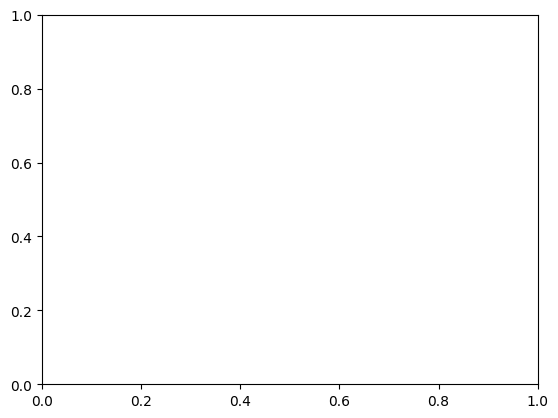

In [135]:
plt.rcdefaults() 
ax = plt.axes()
ax.set_facecolor("white")

382
1/1 [==============================] - 0s 154ms/step
0.022101099288179604


<Figure size 800x600 with 0 Axes>

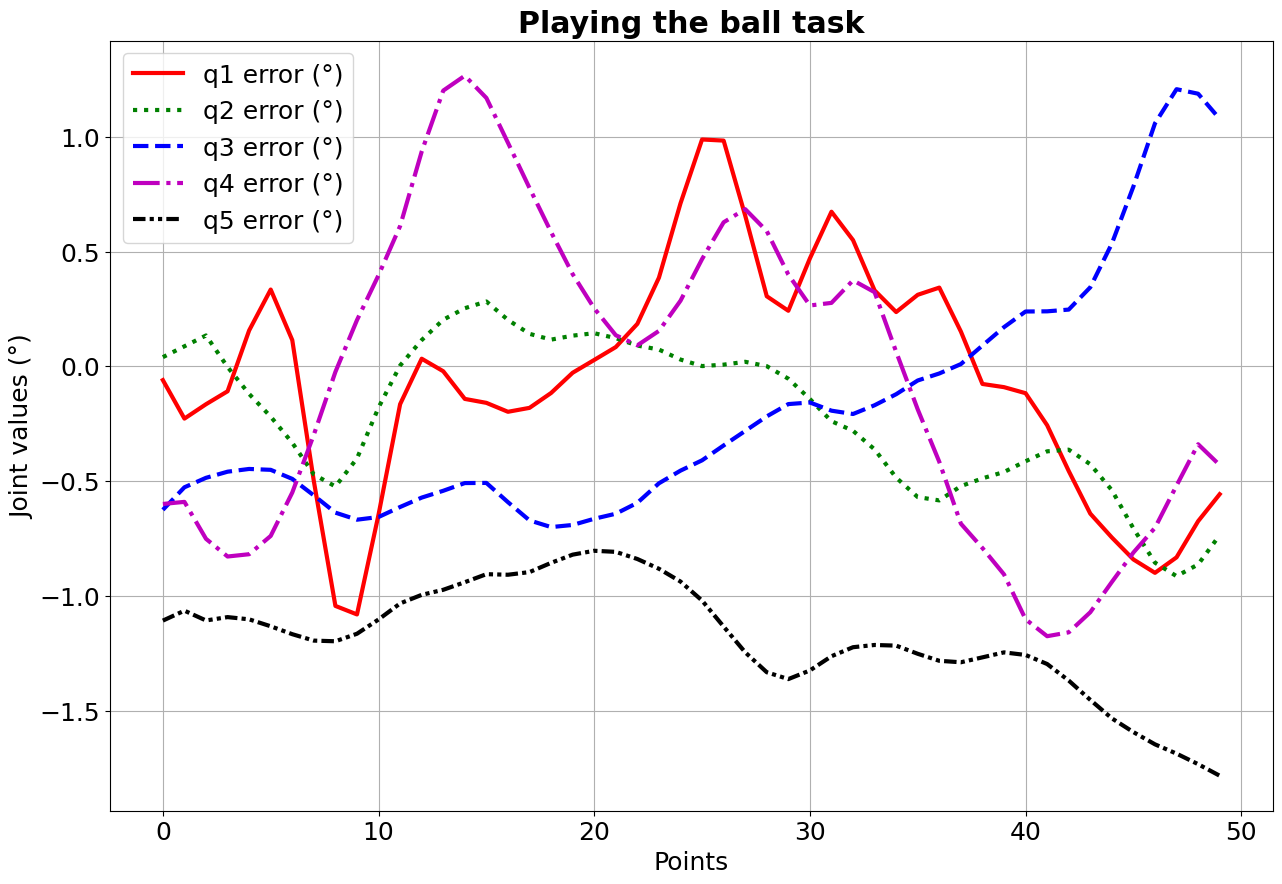

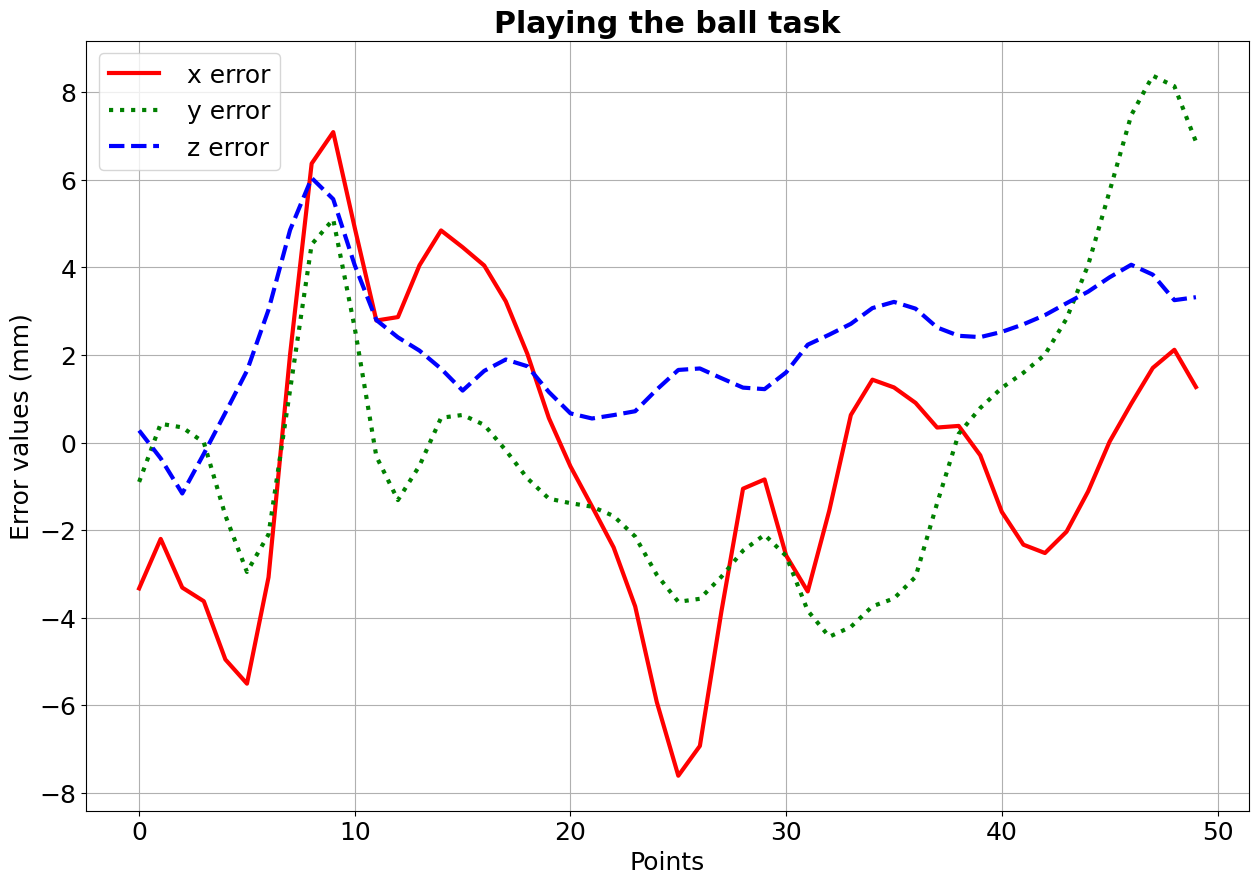

In [136]:

plt.figure(figsize = (4,3),dpi =200)
plt.rcParams.update({'font.size': 18})
x= range(y_test.shape[1])
n= np.random.randint(0, 600)
# n=394
print(n)
y_1=model.predict(X_test[n-1:n])
y = y_1[0]
y_t=y_test[n-1:n][0]
print((y - y_t).max())

colors = ['r', 'g', 'b', 'm', 'k']
linestyles = ['-', ':', '--', '-.', (0, (3, 1, 1, 1, 1, 1))]
# for i in range(y.shape[-1]):
#     plt.plot(x,y[:,i]*180/np.pi, label = f"q{i+1} predict (°)", color=colors[i])
#     plt.plot(x,y_t[:,i]*180/np.pi, label = f"q{i+1} target (°)", linestyle="--",  color=colors[i])  
#     plt.legend()
# plt.show()
plt.figure(figsize = (15,10),dpi = 100)
for i in range(y.shape[-1]):
    plt.plot(x,(y[:,i] - y_t[:,i])*180/np.pi, label = f"q{i+1} error (°)",  color=colors[i],linewidth=3, linestyle=linestyles[i])
plt.legend()
plt.title(title, weight='bold')
plt.xlabel("Points")
plt.ylabel("Joint values (°)")
plt.grid()
plt.savefig(f"plot/q_error{name}.svg")

# Setting the background color of the
# plot using set_facecolor() method


erorr= (robot.fkine(y).t-X_test[n-1:n][0]*1000)
plt.figure(figsize = (15,10),dpi = 100)
ey = ['x','y','z']
for i in range(erorr.shape[-1]):
    plt.plot(x,erorr[:,i], label = f" {ey[i]} error",  color=colors[i],linewidth=3, linestyle=linestyles[i])
plt.legend()
plt.title(title, weight='bold')
plt.xlabel("Points")
plt.ylabel("Error values (mm)")
plt.grid()
plt.savefig(f"plot/dis_error{name}.svg")

plt.show()

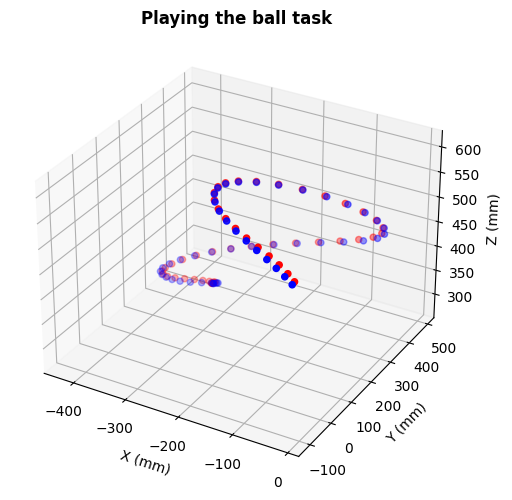

In [139]:
%matplotlib inline
fig = plt.figure(figsize = (8,6),dpi =100)
ax = fig.add_subplot(111, projection='3d')
plt.rcdefaults() 
plt.title(title, weight='bold')

ax.set_facecolor("white")
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
E= X_test[n-1:n][0]*1000
Ep = robot.fkine(y_1).t
ax.scatter3D(E[:, 0], E[:, 1], E[:, 2], color='b')
ax.scatter3D(Ep[:, 0], Ep[:, 1], Ep[:, 2], color='r')
plt.savefig(f"plot/endpoints{name}.svg")

# def plotE(E, color='k'):
#     ax.scatter3D(E[:, 0], E[:, 1], E[:, 2], color=color)

